# Assignment 2 - Find complex answers to medical questions

**Submission deadline: Friday 22 April, 5pm.** 

Late submissions **will not be accepted** without an approved [Special Consideration](http://from.mq.edu.au/MT0X0E0FUrrU200rm0JB0U0) request.  Assessments submitted after the due date will receive a mark of **zero**.

**Assessment marks: 20 marks (20% of the total unit assessment)**

In this assignment we will work on a task of "query-focused summarisation" on medical questions where the goal is, given a medical question and a list of sentences extracted from relevant medical publications, to determine which of these sentences from the list can be used as part of the answer to the question.

We will use data that has been derived from the **BioASQ challenge** (http://www.bioasq.org/), after some data manipulation to make it easier to process for this assignment. The BioASQ challenge organises several "shared tasks", including a task on biomedical semantic question answering which we are using here. The data are in the file `bioasq10_labelled.csv`, which is part of the zip file provided. Each row of the file has a question, a sentence text, and a label that indicates whether the sentence text is part of the answer to the question (1) or not (0).

The following code uses pandas to store the file `bioasq10_labelled.csv` in a data frame and show the first rows of data. For this code to run, first you need to unzip the file `data.zip`:

In [4]:
#!unzip data.zip
!tar xzf data.zip


In [5]:
import pandas as pd
dataset = pd.read_csv("bioasq10b_labelled.csv")
dataset.head()

,qid,sentid,question,sentence text,label
0,0,0,Is Hirschsprung disease a mendelian or a multi...,Hirschsprung disease (HSCR) is a multifactoria...,0
1,0,1,Is Hirschsprung disease a mendelian or a multi...,"In this study, we review the identification of...",1
2,0,2,Is Hirschsprung disease a mendelian or a multi...,The majority of the identified genes are relat...,1
3,0,3,Is Hirschsprung disease a mendelian or a multi...,The non-Mendelian inheritance of sporadic non-...,1
4,0,4,Is Hirschsprung disease a mendelian or a multi...,Coding sequence mutations in e.g.,0


The columns of the CSV file are:

* `qid`: an ID for a question. Several rows may have the same question ID, as we can see above.
* `sentid`: an ID for a sentence.
* `question`: The text of the question. In the above example, the first rows all have the same question: "Is Hirschsprung disease a mendelian or a multifactorial disorder?"
* `sentence text`: The text of the sentence.
* `label`: 1 if the sentence is a part of the answer, 0 if the sentence is not part of the answer.

# Task 1 (5 marks): Data preparation

Partition the data into the training, dev_test, and test sets using the proportions 6:2:2. That is, 60% of the questions must be in the training set, 20% must be in the dev_test set, and the remaining 20% in the test set. Make sure that you partition based on the questions, not on the rows. With this we mean that all the sentences related to a question must be in one file only. In other words, there must not be sentences from the same question in, say, the training and the test data.

Also, make sure that you implement a random partition.

Save the partitions as the files `training.csv`, `dev_test.csv`, and `test.csv`, so that they can be used by other people.

The breakdown of marks is as follows:

* **1 mark** if your explanation answers the following question correctly: Why do we want to split the partition on the questions, and not on the rows?
* **1 mark** if the code partitions the data on the questions randomly and according to the split 6:2:2.
* **1 mark** if your code generates partitions that have similar balance of labels and you demonstrate that they are similar.
* **1 mark** if the partitions are saved as the CSV files `training.csv`, `dev_test.csv`, and `test.csv`.
* **1 mark** for good coding and documentation in this task.


## Why questions, not rows?
The data is split up based on each question rather than each row as we do not want the same question to be in the training, test or devtest set. This is because training and testing with the same data (or categories of data such as the same question) could easily lead to overfitting. For example, if we were to train a model using a question, and then were to test the model using the same question it would be able to answer it based on the data given to it rather than from learning relationships. 

Input seed for random assortment of questions, will have same assortment for same seed (allows for reproducible results)

In [6]:
seed = 1000

In order to divide the dataset whilst keeping the questions together we must do the following:
* Create another data set which contains one row for each question, along with each index in the original dataset that corresponds to the question
* Randomly shuffle this new dataset
* Divide the new dataset into three buckets representing train, dev test and test sets based on the given ratios (60/20/20)
* Divide the original dataset into train, dev test and test sets by looking up which 'bucket' each question belongs to

In [7]:
dataset['dataset index'] = dataset.index #add new column to keep train of the original datasets index
groupedDataSet = dataset.groupby('qid').agg(list) #create new dataset with one row for each question
groupedDataSet = groupedDataSet.sample(frac = 1, random_state= seed) #randomly shuffle new dataset based on 'seed'
size = len(groupedDataSet.index)
# divide new data set into 'buckets'
groupedTrain = groupedDataSet[:(int)(size * 0.6)]
groupedDT = groupedDataSet[(int)(size * 0.6):(int)(size * 0.8)]
groupedTest = groupedDataSet[(int)(size * 0.8):]


In [9]:
# create lists of which indices from the original data set belong to which bucket
trainIndexList = groupedTrain['dataset index'].tolist()
newIndexList = []
for x in trainIndexList:
    for y in x:
        newIndexList.append(y)

trainIndexList = newIndexList

dTrainIndexList = groupedDT['dataset index'].tolist()
newIndexList = []
for x in dTrainIndexList:
    for y in x:
        newIndexList.append(y)

dTrainIndexList = newIndexList

testIndexList = groupedTest['dataset index'].tolist()
newIndexList = []
for x in testIndexList:
    for y in x:
        newIndexList.append(y)

testIndexList = newIndexList


In [10]:
# divide assign indices from original dataset to each 'bucket'
train_set = dataset.iloc[trainIndexList]
devtest_set = dataset.iloc[dTrainIndexList]
test_set = dataset.iloc[testIndexList]


print("Size of training set:", len(train_set))
print("Training set ratio: ", train_set['label'].sum() / len(train_set))
print("Size of devtest set:", len(devtest_set))
print("Dev Test set ratio: ", devtest_set['label'].sum() / len(devtest_set))
print("Size of test set:", len(test_set))
print("Test set ratio: ", test_set['label'].sum() / len(test_set))


Size of training set: 38657
Training set ratio:  0.29634994955635463
Size of devtest set: 12791
Dev Test set ratio:  0.29817840669220547
Size of test set: 12664
Test set ratio:  0.3034586228679722


As seen above, the sizes of each set turn out to be roughly equivalent to a 60/20/20 split of the original data. 
I have also included an ouput of the ratio of each positive label to the total size of each data set (by adding up the total labels and dividing by the size of the dataframe). These ratios being similar would indicate there that there is an even split of labels between each data set.

In [11]:
# save results into csv files
train_set.to_csv('training.csv')
devtest_set.to_csv('dev_test.csv')
test_set.to_csv('test.csv')

# Task 2 (5 marks): Cosine similarity

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us in the file `data.zip` (so that any possible errors that you may have introduced in task 1 do not propagate to this task and following tasks).

Implement a simple text summariser that is based on the cosine similarity between the question and the text. Use the following function signature.

```{python}
def cosine_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest cosine similarity
    with the question. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[3, 1, 4], [12, 4, 13]]"""

```

To obtain the text vectors, use sklearn's tf.idf libraries this way:

* Use all the defaults from the TfidfVectorizer instance, except for `stop_words="english"` and `max_features=10000`. The latter option will restrict the vocabulary size to 10,000. This will speed up the computations and reduce the memory footprint in the subsequent tasks.
* Use the `fit` method on the text of `training.csv`. In your documentation, please explain and justify what decision choices you made to select the correct text: would you use the question text only, the sentence text, or both?

Evaluate the summariser by reporting the mean F1 score on each of the three CSV files `training.csv`, `devtest.csv`, and `test.csv`, for $n=5$. To calculate the mean F1 score, do this:

1. For each question ID in the file, calculate the F1 score by comparing the result of your cosine summariser and the given labels. Feel free to use sklearn's functions to compute the F1 score, or implement your own version of the F1 scoring function if you prefer.
2. Calculate the mean of the F1 scores calculated in step 1.

Find the value of $n$ that returns the highest mean F1 score on the dev_test data.

The breakdown of marks is as follows:

* **1 mark** if the code generates the tf.idf vectors correctly. The explanations that justify the decisions made are reasonable. In particular, explain and justify what information you used to fit tf.idf.
* **1 mark** if the code calculates cosine similarity correctly.
* **1 mark** if the code returns the IDs of the $n$ sentences that have the highest cosine similarity with the question.
* **1 mark** if the notebook reports the F1 scores of the dev_test file and identifies the value of $n$ that gives the highest score on the dev_test file.
* **1 mark** for good coding and documentation in this task. In particular, comment on the reason why you think the value of $n$ that gives highest F1 has that value.

In [12]:
#import statements and establishing a training set to work with
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
training = pd.read_csv("training.csv")

## Creating the TF.IDF Vectorizer
The tf.idf vecotrizer is created and trained using both the sentence text and the question text. As we are trying to learn how well a certain sentence answers a certain question, it is important to tell our model what those questions are. If we were to train the model with just sentence text, it would not be able to learn why a particular sentence answers a question. A sentence may be a good answer for one question but a bad answer for another.

In [13]:
#create the tfidf vecotizer 
vectorizer = TfidfVectorizer(use_idf=True, stop_words='english', max_features=10000)
vectorizer.fit(training['sentence text'], training['question'])

TfidfVectorizer(max_features=10000, stop_words='english')

The cosine summariser outputs the top n answers to each of the propsed question ids.
This performs this operation with the following steps:
<ol>
    <li> Loops through each given question id. </li>
    <li> Stores the tf.idf of the current question </li>
    <li> Loops through each answer to the current question </li>
    <li> Finds the tf.idf of the current answer to the current question </li>
    <li> Finds the dot product of the answer tf.idf and the question tf.idf </li>
    <li> Adds the dot product to the results list if it is better than at least one of the current elements </li>
    <li> Returns a sorted list (by dot product score) of answer ids for the question </li>
</ol>


In [272]:
def cosine_summariser(csvfile, questionids, n=5):
      totalResults = []
      totalResults_scores = []
      file = pd.read_csv(csvfile)
      
      for qid in questionids: #loops through each question id
         if(len(file[file.qid == qid]) > 0): #only performs the operation if the question id is in the dataframe
            #finds tf.idf score of the current question
            questionVector = vectorizer.transform([file[file.qid == qid]['question'].to_numpy()[0]]).toarray()[0]
            results = []
            results_scores = []
            results_worst = 1
            
            df = file[file['qid'] == qid].copy()
            #loops through each answer
            for i in range(0,len(df.index)):
               #finds the tf.idf of the current answer
               answerVector = vectorizer.transform([df['sentence text'].iloc(0)[i]]).toarray()[0]
               answerID = df['sentid'].iloc(0)[i]
               #finds the dot product of the question and answer tf.idf scores
               score = np.dot(questionVector, answerVector)
               if len(results) < n:
                  # It is one of the top n results by default
                  results.append(answerID)
                  results_scores.append(score)
                  results_worst = np.min((results_worst, score))
                  continue
               if score > results_worst:
                  # It is one of the top n results; replace with worst so far
                  j = np.argmin(results_scores)
                  results_scores[j] = score
                  results[j] = answerID
                  results_worst = np.min(results_scores)
            results = sorted(results, key=lambda x: results_scores[results.index(x)], reverse=True)
            totalResults.append(results)
            totalResults_scores.append(results_scores)
      
      return sorted(totalResults)
        
       
     #  """Return the IDs of the n sentences that have the highest cosine similarity
  #  with the question. The input questionids is a list of question ids. The 
  #  output is a list of lists of sentence ids
   # >>> cosine_summariser('test.csv', [3, 11], 3)
 #   [[3, 1, 4], [12, 4, 13]]"""
         



## Evaluating the Summariser 
We will evaluate the summariser following these steps:
<ol>
    <li> Loops through <i>n</i> values 1, 2, 3 ,4 and 5 </li>
    <li> Loops through each question id in the devtest set </li>
    <li> For the current dataframe, orders the sentences (answers) by their label and stores this array </li>
    <li> Uses the cosine summariser to predict the order of the answers </li>
    <li> Compares the actual values (from step 3) with the predicted values (from step 4) using an f1 summariser </li>
    <li> Stores the value of the f1 summariser </li>
    <li> Finds the average f1 score of all the questions </li>
    <li> Stores each average f1 score for each value of <i> n </i> in an array </li>
</ol>

In [247]:
from sklearn.metrics import f1_score
nValueScores = []
for n in range(1,5):
    f1Scores = []
    for qid in devtest_set['qid'].unique():
        actual = devtest_set[devtest_set.qid == qid].sort_values(by=['label'])['sentid'].to_numpy()[:n]
        predicted = cosine_summariser('dev_test.csv', [qid], n)
        predicted = np.array(predicted[0])
        f1Scores.append(f1_score(actual, predicted, average='micro'))

    nValueScores.append(np.mean(f1Scores))
#print(actual, predicted)

In [277]:
nValue = nValueScores.index(max(nValueScores)) + 1
print("The value of n that gives the highest f1 score is: ", nValue)
print("The accruacy was: ", max(nValueScores))

The value of n that gives the highest f1 score is:  1
The accruacy was:  0.22195985832349469


In [251]:
nValueScores

[0.22195985832349469,
 0.20306965761511217,
 0.20621802439984258,
 0.20297127115308933]

My code returns that the value of <i> n </i> that gives the highest f1 score compared with my cosine summariser is 1.
I believe that this is because the labels of the data are either 1 or 0. This means that if there are 5 sentences that answer a question, and 3 of them are labelled 1 the other 2 would be labelled 0. This means that ordering the sentence ids by their label would result in 3 equal first placed and 2 equal last placed elements. Because the cosine summariser has values other than 1 or 0, it can have 5 (or more) unique values and therefore will have more nuanced placements of its results. Essentially my code is comparing binary labels to multivalued prediction data. Because of this, as the value of n increases, there is more room for equally placed elements in the actual values to be in a different order to the predicted values. 

# Task 3 (5 marks): Simple NN

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us.

Implement a simple TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept the tf.idf of the sentence text (we will ignore the question text in this task). Use the TfidfVectorizer instance that you have fitted in task 2.
2. A hidden layer and a relu activation function. You need to determine the size of the hidden layer.
3. An output layer with one cell. The output layer will classify the input text (binary classification).

Train the model with the training data and use the dev_test set to determine a good size of the hidden layer. 

With the model that you have trained, and implement a summariser that returns the $n$ sentences with highest predicted score. Use the following function signature:

```{python}
def nn_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest predicted score. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[2, 1, 3], [7, 14, 10]]"""

```

Report the final results using the test set. Remember: use the test set to report the final results of the best system only.

Based on your experiments, comment on whether this system is better than the system developed in task 2. To make this task less time-consuming, focus only on $n=5$.

The breakdown of marks is as follows:

* **1 mark** if the NN model has the correct layers, the correct activation functions, and the correct loss function.
* **1 mark** if the code passes the tf.idf information of the text to the model correctly.
* **1 mark** if the code returns the IDs of the $n$ sentences that have the highest prediction score in the given question.
* **1 mark** if the notebook reports the F1 scores of the test sets and comments on the results.
* **1 mark** for good coding and documentation in this task. In particular, the code and results must include evidence that shows your choice of best size of the hidden layer. The explanations must be clear and concise. To make this task less time-consuming, use $n=5$.

## Creating Models and Determining Hidden Layer Size
We will create 3 seperate models with increasing hidden layer size (1, 5 and 7). We will then plot the accuracy of the validation and training scores over each epoch of the model. From these plots we will be able to see how the different hidden layer sizes will effect the accuracy of the model.

In [22]:
# import statements
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

#1 Hidden Layer
model1HL = models.Sequential()
model1HL.add(layers.Dense(1, activation='relu', input_shape = (len(vectorizer.get_feature_names()),)))
model1HL.add(layers.Dense(1, activation='sigmoid'))
model1HL.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

#5 Hidden Layers
model5HL = models.Sequential()
model5HL.add(layers.Dense(5, activation='relu', input_shape = (len(vectorizer.get_feature_names()),)))
model5HL.add(layers.Dense(1, activation='sigmoid'))
model5HL.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

#7 Hidden Layers
model7HL = models.Sequential()
model7HL.add(layers.Dense(7, activation='relu', input_shape = (len(vectorizer.get_feature_names()),)))
model7HL.add(layers.Dense(1, activation='sigmoid'))
model7HL.compile(loss='binary_crossentropy',
              metrics=['accuracy'])

In [268]:
#creating the training and devtest data and labels
train_data = vectorizer.transform(training['sentence text']).toarray()
train_labels = training['label']
devtest = pd.read_csv("dev_test.csv")
devtest_data = vectorizer.transform(devtest['sentence text']).toarray()
devtest_labels = devtest['label']

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
#function to plot the training and validation accuracy of a model
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    

In [265]:
#fitting each model with the training data
history1HL = model1HL.fit(train_data,
                    np.array(train_labels),
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, np.array(devtest_labels)))
history5HL = model5HL.fit(train_data,
                    np.array(train_labels),
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, np.array(devtest_labels)))
                    
history7HL = model7HL.fit(train_data,
                    np.array(train_labels),
                    epochs=100,
                    batch_size=100,
                    validation_data=(devtest_data, np.array(devtest_labels)))
                    

Epoch 1/100
387/387 [==============================] - 4s 9ms/step - loss: 0.6256 - accuracy: 0.7037 - val_loss: 0.6068 - val_accuracy: 0.7018
Epoch 2/100
387/387 [==============================] - 2s 6ms/step - loss: 0.5948 - accuracy: 0.7037 - val_loss: 0.6039 - val_accuracy: 0.7018
Epoch 3/100
387/387 [==============================] - 2s 6ms/step - loss: 0.5842 - accuracy: 0.7037 - val_loss: 0.6019 - val_accuracy: 0.7018
Epoch 4/100
387/387 [==============================] - 2s 6ms/step - loss: 0.5731 - accuracy: 0.7037 - val_loss: 0.6010 - val_accuracy: 0.7018
Epoch 5/100
387/387 [==============================] - 2s 6ms/step - loss: 0.5621 - accuracy: 0.7037 - val_loss: 0.6015 - val_accuracy: 0.7018
Epoch 6/100
387/387 [==============================] - 2s 6ms/step - loss: 0.5522 - accuracy: 0.7046 - val_loss: 0.6033 - val_accuracy: 0.7012
Epoch 7/100
387/387 [==============================] - 2s 6ms/step - loss: 0.5434 - accuracy: 0.7189 - val_loss: 0.6067 - val_accuracy: 0.6887

Training and validation accuracy with 1 hidden layer


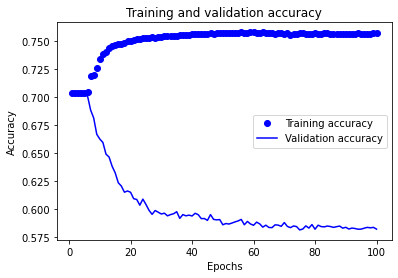

Training and validation accuracy with 5 hidden layers


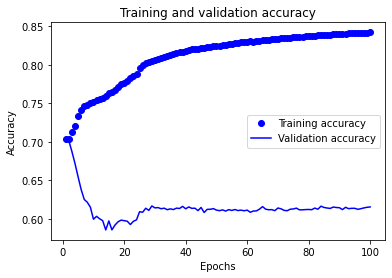

Training and validation accuracy with 7 hidden layers


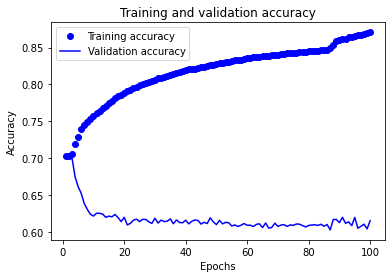

In [271]:
print("Training and validation accuracy with 1 hidden layer")
plot_history(history1HL)
print("Training and validation accuracy with 5 hidden layers")
plot_history(history5HL)
print("Training and validation accuracy with 7 hidden layers")
plot_history(history7HL)

#### Summary of model creation and hiden layers
As we can see above, increasing the number of hidden layers will increase the training accuracy of the model but the validation accuracy appears to be unrelated to the hidden layer size. An increased number of epochs may allow an even greater level of training accuracy and a greater number of hidden layers may also lead to a greater training accuracy. However, as my computer would not be able to handle an increased number of epochs or more hidden layers, we will continue with only 7 hidden layers. 

### NN_Sumariser
The following function operates in a similar way to the cosine summariser of question 2 with the following steps:
<ol>
    <li> Loops through each given question id. </li>
    <li> Stores the output of the question run through the model </li>
    <li> Loops through each answer to the current question </li>
    <li> Finds the prediction value from the model of the current answer to the current question </li>
    <li> Finds the dot product of the answer prediction value and the question prediction value </li>
    <li> Adds the dot product to the results list if it is better than at least one of the current elements </li>
    <li> Returns a sorted list (by dot product score) of answer ids for the question </li>
</ol>

In [273]:
def nn_summariser(csvfile, questionids, n=5):
 
         totalResults = []
         totalResults_scores = []
         file = pd.read_csv(csvfile)
         
         for qid in questionids:
            if(len(file[file.qid == qid]) > 0): 
               results = []
               results_scores = []
               results_worst = 1
               
               df = file[file['qid'] == qid].copy()
               
               for i in range(0,len(df.index)):
                  predictValue = vectorizer.transform([df['sentence text'].iloc(0)[i]]).toarray()
                  answerID = df['sentid'].iloc(0)[i]
                  score = model7HL.predict(predictValue)
                  if len(results) < n:
                        # It is one of the top n results by default
                     results.append(answerID)
                     results_scores.append(score)
                     results_worst = np.min((results_worst, score))
                     continue
                  if score > results_worst:
                     # It is one of the top n results; replace with worst so far
                     j = np.argmin(results_scores)
                     results_scores[j] = score
                     results[j] = answerID
                     results_worst = np.min(results_scores)
               results = sorted(results, key=lambda x: results_scores[results.index(x)], reverse=True)
               totalResults.append(results)
               totalResults_scores.append(results_scores)
      
         return sorted(totalResults)

### Evaluating the nn_sumariser 
Again similar to question 2, we will run the nn_sumariser for each question in the test set and store the f1_score of the comparison between the actual and predicted values of each answer. From this array we will find the average f1Score which will give us a good understanding of how accurate the model is. 

In [276]:
n = 5
import warnings
warnings.filterwarnings('ignore')
nnf1Scores = []
for qid in test_set['qid'].unique():
    actual = test_set[test_set.qid == qid].sort_values(by=['label'])['sentid'].to_numpy()[:n]
    predicted = nn_summariser('test.csv', [qid], n)
    predicted = np.array(predicted[0])
    nnf1Scores.append(f1_score(actual, predicted, average='micro'))


In [278]:
np.mean(nnf1Scores)

0.1711727666273121

### Summary of evaluation
As seen above, the mean of the f1 scores of my model was 0.17 which is means that my model was inaccurate. As the cosine summariser had an accuracy of 0.2, the simple nn_summariser is less accurate.

# Task 4 (5 marks): Recurrent NN

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us.

Implement a more complex neural network that is composed of the following layers:

* An embedding layer that generates embedding vectors of the sentence text with 35 dimensions.
* A LSTM layer. You need to determine the size of this LSTM layer, and the text length limit (if needed).
* The final output layer with one cell for binary classification, as in task 3.

Train the model with the training data, use the dev_test set to determine a good size of the LSTM layer and an appropriate length limit (if needed), and report the final results using the test set. Again, remember to use the test set only after you have determined the optimal parameters of the LSTM layer.

Based on your experiments, comment on whether this system is better than the systems developed in the previous tasks.

The breakdown of marks is as follows:

* **1 mark** if the NN model has the correct layers, the correct activation functions, and the correct loss function.
* **1 mark** if the code passes the sentence text to the model correctly. The documentation needs to explain what decisions had to be made to process long sentences. In particular, did you need to truncate the input text, and how did you determine the length limit?
* **1 mark** if the code returns the IDs of the *n* sentences that have the highest prediction score in the given question.
* **1 mark** if the notebook reports the F1 scores of the test sets and comments on the results.
* **1 mark** for good coding and documentation in this task. In particular, the code and results must include evidence that shows your choice of best size of the LSTM layer. The explanations must be clear and concise. To make this task less time-consuming, use $n=5$.

### Number of words and max sentence length
We will use the previous tf.idf vectorizer in order to find the total number of words to consider. <br>
We will also graph a historgram of all the sentence lengths in the training data. From this we can see what the length of the majority of sentences is and will be able to chose an appropriate value for the maximum sentence length to consider.

In [153]:
training['sentence text'].str.len().values
sentence_lengths = training['sentence text'].str.len().values

(array([3.279e+04, 5.559e+03, 2.200e+02, 2.600e+01, 2.100e+01, 1.600e+01,
        9.000e+00, 1.000e+01, 1.000e+00, 5.000e+00]),
 array([1.0000e+00, 2.3480e+02, 4.6860e+02, 7.0240e+02, 9.3620e+02,
        1.1700e+03, 1.4038e+03, 1.6376e+03, 1.8714e+03, 2.1052e+03,
        2.3390e+03]),
 <BarContainer object of 10 artists>)

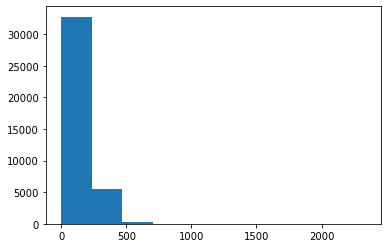

In [154]:
import matplotlib.pyplot as plt
plt.hist(sentence_lengths)


As seen in this graph, there are very few sentences that have a length above 500. So if we set the maximum length to be 500, the majority of sentences should be covered. 

In [155]:
# Determining amount of words to consider
numWords = len(vectorizer.get_feature_names())
# Determining the maximum string length to consider
maxlen = 500

### Creating Training and DevTest Vectors
We will use the tokenizer and pad_sequences in order to prepare our data to train the model. <br>
The tokenier first creates a dictionary of all words in the training set and assigns them various numbers representing each word. <br>
The pad_sequences function then ensures the vectors for devtest and training values are the same length. 

In [160]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(numWords)
train_texts = training['sentence text'].to_numpy()
tokenizer.fit_on_texts(train_texts)


training_sequences = tokenizer.texts_to_sequences(train_texts)
training_vectors = pad_sequences(training_sequences, maxlen=maxlen)
devtest_sequences = tokenizer.texts_to_sequences(devtest_set['sentence text'].to_numpy())
devtest_vectors = pad_sequences(devtest_sequences, maxlen = maxlen)

In [161]:
training_vectors.shape

(38657, 500)

#### Creating the LSTM Model
We will create the LSTM model using an embedding layer, a LSTM layer of an equal size to the embedding layer, a dense hidden layer with a sigmoid activiation and a binary loss function, ensuring a binary output. 

In [162]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
lengths = training["sentence text"].str.len()

lstm_model = models.Sequential()
lstm_model.add(Embedding(numWords, 35))
lstm_model.add(LSTM(35))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 35)          350000    
                                                                 
 lstm_7 (LSTM)               (None, 35)                9940      
                                                                 
 dense_13 (Dense)            (None, 1)                 36        
                                                                 
Total params: 359,976
Trainable params: 359,976
Non-trainable params: 0
_________________________________________________________________


### Fitting the model
We will fit the model with only 5 epochs as my computer is a bit alow however I would ideally fit the model with 10 epochs. We will also use the devtest set as validation data. 

In [164]:
history = lstm_model.fit(training_vectors, 
                    np.array(training['label']),
                    epochs=5,
                    batch_size=32,
                    validation_split = 0.2,
                    validation_data=(devtest_vectors, np.array(devtest_set['label'])))

Epoch 1/5
967/967 [==============================] - 187s 193ms/step - loss: 0.5750 - acc: 0.7104 - val_loss: 0.6018 - val_acc: 0.6936
Epoch 2/5
967/967 [==============================] - 192s 199ms/step - loss: 0.4712 - acc: 0.7752 - val_loss: 0.6810 - val_acc: 0.6170
Epoch 3/5
967/967 [==============================] - 202s 209ms/step - loss: 0.3907 - acc: 0.8252 - val_loss: 0.7283 - val_acc: 0.6001
Epoch 4/5
967/967 [==============================] - 189s 196ms/step - loss: 0.3233 - acc: 0.8623 - val_loss: 0.8282 - val_acc: 0.6350
Epoch 5/5
967/967 [==============================] - 199s 206ms/step - loss: 0.2595 - acc: 0.8925 - val_loss: 0.9796 - val_acc: 0.6011


## LSTM Summariser
In the same way as questions 1 and 2, the following function takes in a question ID 

In [175]:
def lstm_summariser(csvfile, questionids, n=5):
 
         totalResults = []
         totalResults_scores = []
         file = pd.read_csv(csvfile)
         
         for qid in questionids:
            if(len(file[file.qid == qid]) > 0): 
               results = []
               results_scores = []
               results_worst = 1
               
               df = file[file['qid'] == qid].copy()
               
               for i in range(0,len(df.index)):
                  predictValue = tokenizer.texts_to_sequences([df['sentence text'].iloc(0)[i]])
                  answerID = df['sentid'].iloc(0)[i]
                  if(len(predictValue[0]) < 1):
                     continue
                  score = lstm_model.predict(predictValue)
                  if len(results) < n:
                        # It is one of the top n results by default
                     results.append(answerID)
                     results_scores.append(score)
                     results_worst = np.min((results_worst, score))
                     continue
                  if score > results_worst:
                     # It is one of the top n results; replace with worst so far
                     j = np.argmin(results_scores)
                     results_scores[j] = score
                     results[j] = answerID
                     results_worst = np.min(results_scores)
               results = sorted(results, key=lambda x: results_scores[results.index(x)], reverse=True)
               totalResults.append(results)
               totalResults_scores.append(results_scores)
      
         return sorted(totalResults)

In [176]:
n = 5
import warnings
warnings.filterwarnings('ignore')
lstmf1Scores = []
for qid in test_set['qid'].unique():
    actual = test_set[test_set.qid == qid].sort_values(by=['label'])['sentid'].to_numpy()[:n]
    predicted = lstm_summariser('test.csv', [qid], n)
    predicted = np.array(predicted[0])
    if(len(actual) == len(predicted)):
        lstmf1Scores.append(f1_score(actual, predicted, average='micro'))
    


In [177]:
np.mean(lstmf1Scores)

0.16118343195266274

#### Evaluating the  LSTM Summariser 
As seen above, the mean value of the f1Score of the LSTM summariser is 0.16 which is worse than both 0.2 of the cosine summariser and 0.17 of the the NN sumariser. Potentially with a larger amount of epochs or a different way of comapring the labels to the output of the model the accuracy could be increased.

# Submission of results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax),  which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

Late submissions **will not be accepted** without an approved [Special Consideration](http://from.mq.edu.au/MT0X0E0FUrrU200rm0JB0U0) request.  Assessments submitted after the due date will receive a mark of **zero**.